In [1]:
import geopandas as gpd

# Data source - https://www.hydrosheds.org/products/hydrorivers
samerica_rivers = gpd.read_parquet("../resources/data/rivers.parquet.gzip")
print(samerica_rivers)

         DIST_UP_KM                                           geometry
134325     8.400000  MULTILINESTRING ((-60.22708 5.23958, -60.23125...
134559     8.800000  MULTILINESTRING ((-60.24375 5.21875, -60.24792...
135662    12.500000  MULTILINESTRING ((-60.24792 5.21458, -60.25625...
136105    14.500000  MULTILINESTRING ((-60.27292 5.19375, -60.28125...
136323    10.700000  MULTILINESTRING ((-60.68125 5.19792, -60.67292...
...             ...                                                ...
1500932   37.099998  MULTILINESTRING ((-53.33542 -33.58958, -53.343...
1501022   38.500000  MULTILINESTRING ((-53.36458 -33.59792, -53.368...
1501066   39.500000  MULTILINESTRING ((-53.37708 -33.60625, -53.381...
1501146   14.800000  MULTILINESTRING ((-53.23958 -33.62083, -53.239...
1501594   46.099998  MULTILINESTRING ((-53.38542 -33.61042, -53.389...

[297608 rows x 2 columns]


<AxesSubplot:>

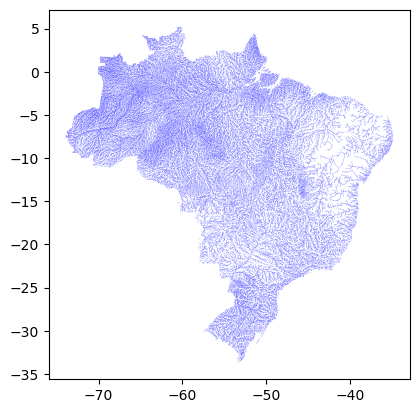

In [2]:
samerica_rivers.plot(color='blue', lw=0.1)

In [3]:
import pandas as pd
import numpy as np

leftSpan = np.amax(samerica_rivers['DIST_UP_KM']) - np.amin(samerica_rivers['DIST_UP_KM'])
rightSpan = 1 - 0.1
valueScaled = (samerica_rivers['DIST_UP_KM'] - np.amin(samerica_rivers['DIST_UP_KM'])) / leftSpan
samerica_rivers['LW_DIST_UP_KM'] = 0.1 + (valueScaled * rightSpan)

<AxesSubplot:>

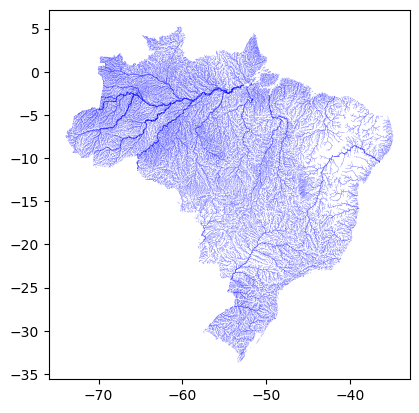

In [4]:
samerica_rivers.plot(edgecolor='face', color='blue', lw=samerica_rivers['LW_DIST_UP_KM'])

In [5]:
import geopandas as gpd

# Data source - https://www.hydrosheds.org/products/hydrobasins
basins = gpd.read_file("../resources/data/hydrobasins_southam.shp")
print(basins.head())

   SUB_BAS  TO_BAS  MAJ_BAS         MAJ_NAME                SUB_NAME  \
0     1003    -999     3001  Caribbean Coast               Altrato 1   
1     1004    1003     3001  Caribbean Coast                   Sucio   
2     1005    1003     3001  Caribbean Coast               Altrato 2   
3     1006    -999     3001  Caribbean Coast  Golfo del Darien Coast   
4     1007    -999     3001  Caribbean Coast                    Sinu   

   SUB_AREA  MAJ_AREA  LEGEND  \
0      5787    317043       1   
1      4933    317043       1   
2     25125    317043       1   
3      9119    317043       1   
4     14009    317043       1   

                                            geometry  
0  POLYGON ((-76.95000 8.12917, -76.95000 8.12500...  
1  POLYGON ((-77.10417 7.41667, -77.10417 7.42083...  
2  POLYGON ((-77.58750 7.17083, -77.58333 7.17083...  
3  POLYGON ((-76.86667 8.02083, -76.87500 8.02083...  
4  POLYGON ((-75.92500 9.45000, -75.92500 9.43750...  


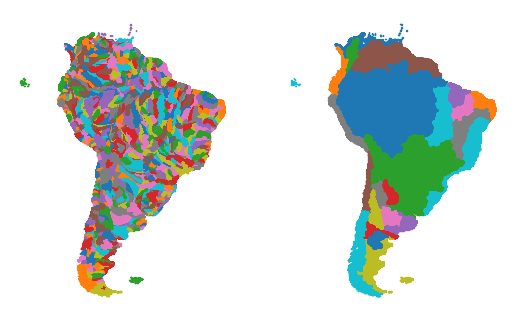

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = plt.subplot(1, 2, 1)
basins.plot(ax=ax1, column='SUB_NAME', edgecolor='face')
ax1.axis('off')

ax2 = plt.subplot(1, 2, 2)
basins.plot(ax=ax2, column='MAJ_NAME', edgecolor='face')
ax2.axis('off')
plt.show()

In [7]:
import pandas as pd

colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                  '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                  '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                  '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                  '#ee82ee', '#A1CAF1', 'orange']

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')


C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

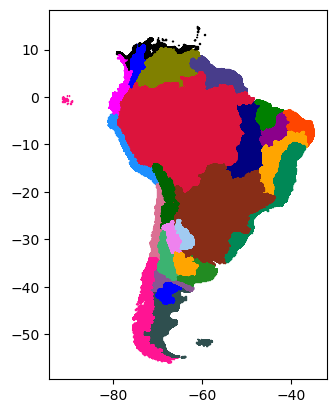

In [8]:
basins.plot(column='MAJ_NAME', edgecolor='face', color=basins['colors'])

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


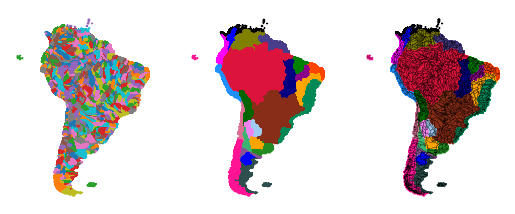

In [9]:
# Visual only - Delete
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = plt.subplot(1, 3, 1)
basins.plot(ax=ax1, column='SUB_NAME', edgecolor='face',)
ax1.axis('off')

ax2 = plt.subplot(1, 3, 2)
basins.plot(ax=ax2, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
ax2.axis('off')

ax3 = plt.subplot(1, 3, 3)
basins.plot(ax=ax3, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
basins.boundary.plot(ax=ax3, color='black', lw=0.1)
ax3.axis('off')

plt.savefig("../resources/data/basins.png", bbox_inches='tight', dpi=1000)
plt.show()

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


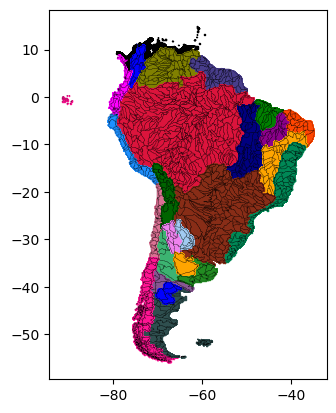

In [10]:
fig, ax = plt.subplots()
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
basins.boundary.plot(ax=ax, color='black', lw=0.1)
plt.show()

In [11]:
rivers_basins = gpd.sjoin(samerica_rivers, basins, predicate="within")

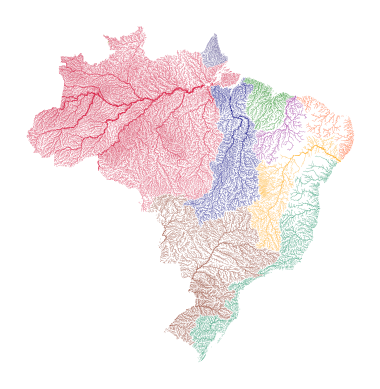

In [12]:
fig, ax = plt.subplots()
rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
ax.axis('off')
plt.savefig("../resources/data/brazil_river_basins.png", bbox_inches='tight', dpi=1000)
plt.show()

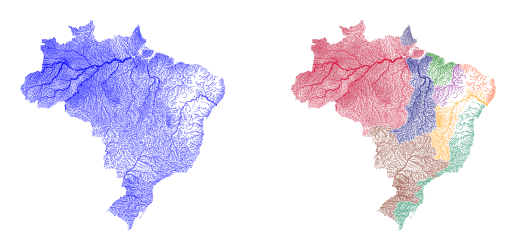

In [13]:
# Visual only - Delete
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = plt.subplot(1, 2, 1)
rivers_basins.plot(ax=ax1, edgecolor='face', color='blue', lw=rivers_basins['LW_DIST_UP_KM'])
ax1.axis('off')

ax2 = plt.subplot(1, 2, 2)
rivers_basins.plot(ax=ax2, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
ax2.axis('off')

plt.savefig("../resources/data/river_maps.png", bbox_inches='tight', dpi=1000)
plt.show()